# Import libraries and data set
fashion mnist is a dataset of clothes

In [3]:
#imports
import tensorflow as tf
from tensorflow import keras

In [4]:
#mnist dataset
from tensorflow.keras.datasets import fashion_mnist

(image_train, label_train), (image_test, label_test) = fashion_mnist.load_data()
print(f"Size of:\ntraining set: {image_train.shape}\ntesting set: {image_test.shape}")
print(f"Labels: {label_train}\nLabel shape: {label_train.shape}")

4422102/4422102 [==============================] - 1s 0us/step
Size of:
training set: (60000, 28, 28)
testing set: (10000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Label shape: (60000,)


# Plot Images

In [5]:
#plotting each image
import matplotlib.pyplot as plt
def plot_image(image, label_true, label_pred = None):
    plt.imshow(image, cmap='gray')
    
    if label_pred is None:
        xlab = f"True: {label_true}"
    else:
        xlab = f"True: {label_true}, Pred: {label_pred}"
        
    plt.xlabel(xlab)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.show

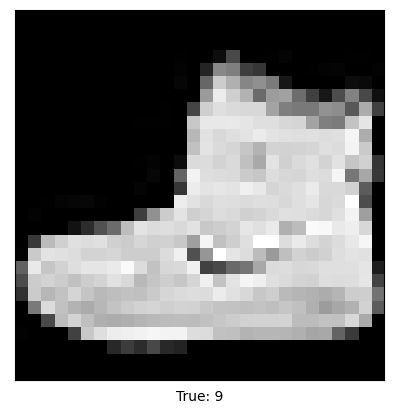

In [6]:
plot_image(image_train[0], label_train[0])

In [9]:
#reshaping the images
X_train = image_train.reshape(image_train.shape[0], -1).astype('float32')/255
X_test = image_test.reshape(image_test.shape[0], -1).astype('float32')/255

print("Size of:")
print(f"- Training-set: {X_train.shape} \ttrain label{image_train.shape}")
print("- Test-set:\t\t{}".format(X_test.shape))

Size of:
- Training-set: (60000, 784) 	train label(60000, 28, 28)
- Test-set:		(10000, 784)


# PCA dimensionality reduction

In [99]:
#PCA dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
print(f"{X_train_pca.shape}, {X_test_pca.shape}")

(60000, 60), (10000, 60)


In [22]:
#one hot encoding:
from keras.utils import to_categorical

y_train = to_categorical(label_train)
y_test = to_categorical(label_test)

for i in range(4):
    print(f"{y_train[i]} = {label_train[i]}\n")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] = 9

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] = 0

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] = 0

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] = 3



# Create model to train

In [100]:
#creating keras sequential model 
from keras.models import Sequential
from keras import layers

model = Sequential([
    keras.Input(shape=(X_train_pca[0].shape)),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(y_train[0].shape[0], activation='softmax')
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 30)                6030      
                                                                 
 dense_88 (Dense)            (None, 30)                930       
                                                                 
 dense_89 (Dense)            (None, 30)                930       
                                                                 
 dense_90 (Dense)            (None, 30)                930       
                                                                 
 dense_91 (Dense)            (None, 30)                930       
                                                                 
 dense_92 (Dense)            (None, 30)                930       
                                                                 
 dense_93 (Dense)            (None, 10)              

In [101]:
op =keras.optimizers.experimental.AdamW(learning_rate=0.001)
model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
hist = model.fit(X_train_pca, y_train, validation_split = 0.1, epochs = 100, batch_size = 10000)

Epoch 1/100
6/6 [==============================] - 3s 104ms/step - loss: 2.2901 - accuracy: 0.0925 - val_loss: 2.2615 - val_accuracy: 0.1242
Epoch 2/100
6/6 [==============================] - 0s 30ms/step - loss: 2.2424 - accuracy: 0.1707 - val_loss: 2.2072 - val_accuracy: 0.2477
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 2.1772 - accuracy: 0.2748 - val_loss: 2.1208 - val_accuracy: 0.3545
Epoch 4/100
6/6 [==============================] - 0s 37ms/step - loss: 2.0738 - accuracy: 0.3809 - val_loss: 1.9913 - val_accuracy: 0.4248
Epoch 5/100
6/6 [==============================] - 0s 31ms/step - loss: 1.9252 - accuracy: 0.4415 - val_loss: 1.8146 - val_accuracy: 0.4642
Epoch 6/100
6/6 [==============================] - 0s 39ms/step - loss: 1.7317 - accuracy: 0.4812 - val_loss: 1.6041 - val_accuracy: 0.5042
Epoch 7/100
6/6 [==============================] - 0s 37ms/step - loss: 1.5157 - accuracy: 0.5170 - val_loss: 1.3834 - val_accuracy: 0.5398
Epoch 8/100
6/6 [==

6/6 [==============================] - 0s 29ms/step - loss: 0.3009 - accuracy: 0.8909 - val_loss: 0.3815 - val_accuracy: 0.8673
Epoch 60/100
6/6 [==============================] - 0s 38ms/step - loss: 0.3009 - accuracy: 0.8909 - val_loss: 0.3793 - val_accuracy: 0.8693
Epoch 61/100
6/6 [==============================] - 0s 34ms/step - loss: 0.2982 - accuracy: 0.8923 - val_loss: 0.3802 - val_accuracy: 0.8707
Epoch 62/100
6/6 [==============================] - 0s 38ms/step - loss: 0.2964 - accuracy: 0.8923 - val_loss: 0.3762 - val_accuracy: 0.8700
Epoch 63/100
6/6 [==============================] - 0s 41ms/step - loss: 0.2947 - accuracy: 0.8934 - val_loss: 0.3761 - val_accuracy: 0.8705
Epoch 64/100
6/6 [==============================] - 0s 38ms/step - loss: 0.2930 - accuracy: 0.8940 - val_loss: 0.3789 - val_accuracy: 0.8688
Epoch 65/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2913 - accuracy: 0.8943 - val_loss: 0.3753 - val_accuracy: 0.8728
Epoch 66/100
6/6 [========

# Evaluate the model

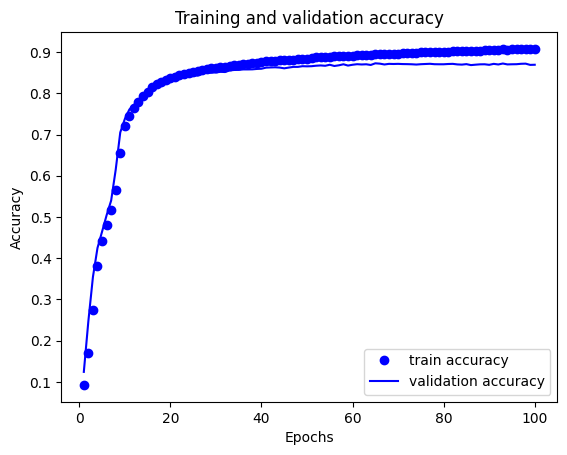

In [103]:
hist = hist.history
train_accuracy = hist['accuracy']
val_accuracy = hist['val_accuracy']
epochs = range(1, len(val_accuracy)+1)
plt.plot(epochs, train_accuracy, 'bo', label='train accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [104]:
results = model.evaluate(X_test_pca, y_test)
print("test loss, test acc:", results)

_, accuracy = model.evaluate(X_test_pca, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8687
test loss, test acc: [0.3932354748249054, 0.8687000274658203]
313/313 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8687
Accuracy: 86.87
